<h1 style="font-size:240%; color:blue; text-align:center; line-height:45px;"> 6. FILTROS EN EL DOMINIO DE LA FRECUENCIA</h1>

<p style="font-size:135%;">Imagenes de prueba</p>

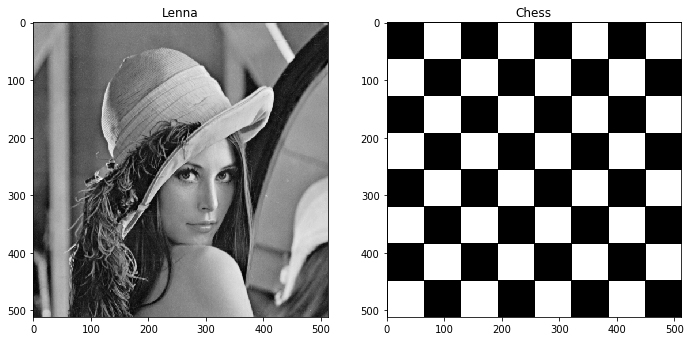

In [23]:
from matplotlib import pyplot as plt
from IPython.display import Image
import numpy as np
import cv2
import math
import time
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='crarojasca', api_key='0TgPUaFsSObByh4UJKQ1')

img=list()

img.append(cv2.imread("Figures/Lenna.png"))
img[0] = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
img.append(cv2.imread("Figures/Chess.png"))
img[1] = cv2.cvtColor(img[1], cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) ,plt.imshow(img[0], cmap='gray')
plt.title('Lenna')
plt.subplot(122) ,plt.imshow(img[1], cmap='gray')
plt.title('Chess')

plt.show()


<h1 style="font-size:210%; color:blue; text-align:center; line-height:45px;"> 1. Filtros Butterworth</h1>

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 1.1. Pasabajos </h1>

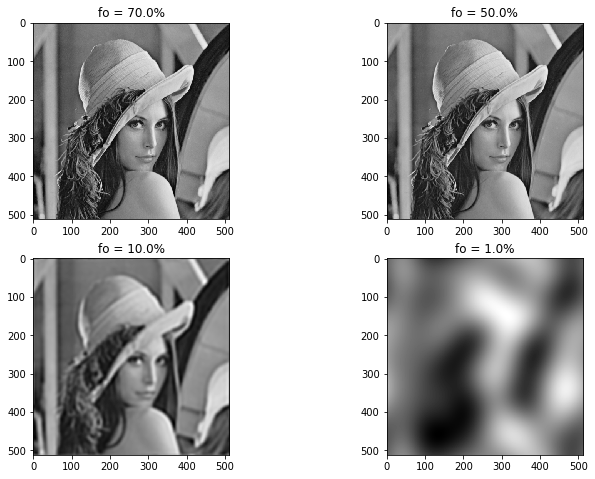

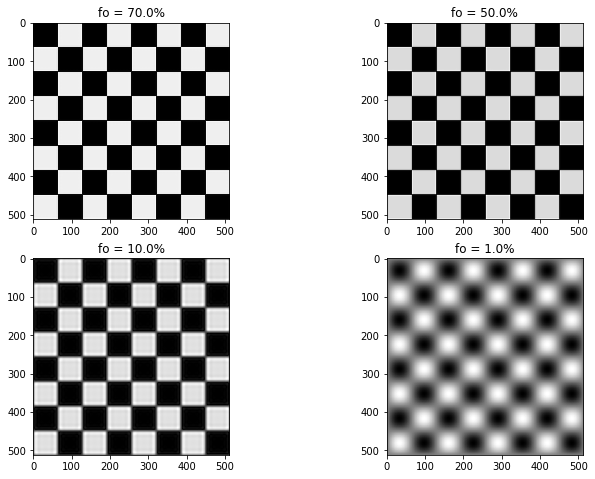

In [25]:
def butterworth_lowPass(img, fo, n):
    base = np.matrix([[math.sqrt((x-img.shape[0]/2)**2+(y-img.shape[1]/2)**2) for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    base = (base-base.min())/(base.max()-base.min())
    base = 1/(1 + np.power((base/fo),(2*n)))
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    
    return out

 
fo = [0.7, 0.5, 0.1, 0.01]

for i in range(len(img)):   
    for j in range(4):  
        lowFlt = butterworth_lowPass(img[i], fo[j], 4)
        plt.figure(i)
        plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
        plt.subplot(2,2,j+1) ,plt.imshow(lowFlt, cmap='gray')
        plt.title('fo = ' + str(fo[j]*100) + '%')

plt.show()


<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 1.2. Pasaaltas </h1>

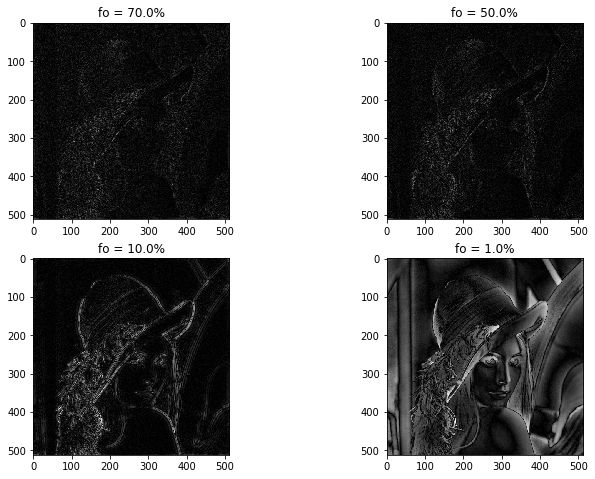

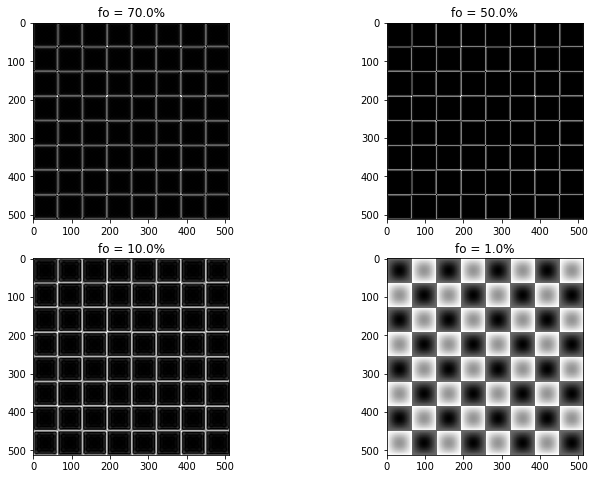

In [27]:
def butterworth_highPass(img, fo, n):
    base = np.matrix([[math.sqrt((x-img.shape[0]/2)**2+(y-img.shape[1]/2)**2) for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    base = (base-base.min())/(base.max()-base.min())
    base = np.power((base/fo),(2*n))/(1 + np.power((base/fo),(2*n)))
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    
    return out

fo = [0.7, 0.5, 0.1, 0.01]

for i in range(len(img)):   
    for j in range(4):  
        highFlt = butterworth_highPass(img[i], fo[j], 4)
        plt.figure(i)
        plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
        plt.subplot(2,2,j+1) ,plt.imshow(highFlt, cmap='gray')
        plt.title('fo = ' +  str(fo[j]*100) + '%')

plt.show()

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 1.3. Pasabandas </h1>

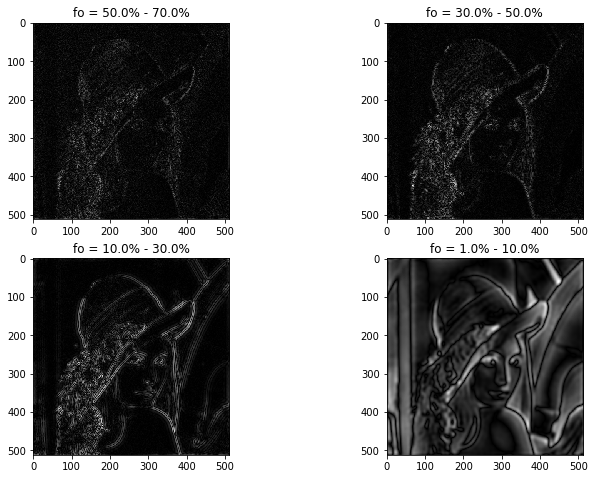

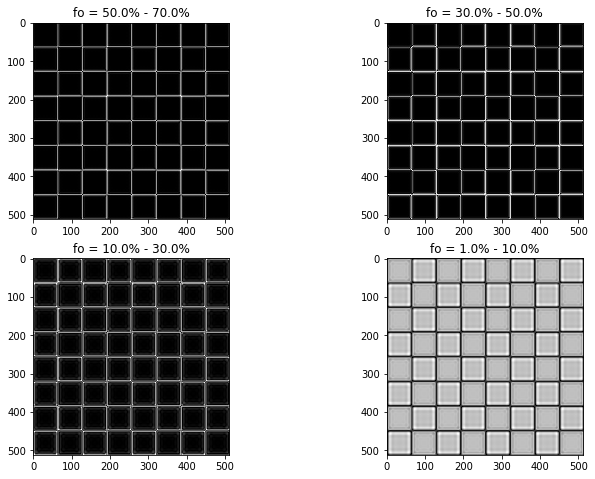

In [28]:
def butterworth_bandPass(img, fo, f1, n):
    lowPass  = butterworth_lowPass(img, f1, 4)
    out = butterworth_highPass(lowPass, fo, 4)
    return out

fo = [0.7, 0.5, 0.3, 0.1, 0.01]

for i in range(len(img)):   
    for j in range(4):  
        bandFlt = butterworth_bandPass(img[i], fo[j+1], fo[j], 4)
        plt.figure(i)
        plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
        plt.subplot(2,2,j+1) ,plt.imshow(bandFlt, cmap='gray')
        plt.title('fo = ' +  str(fo[j+1]*100) + '% - ' + str(fo[j]*100)+ '%')

plt.show()

<h1 style="font-size:210%; color:blue; text-align:center; line-height:45px;"> 2. Tecnicas de Realce</h1>

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.1. Dominio espacial </h1>

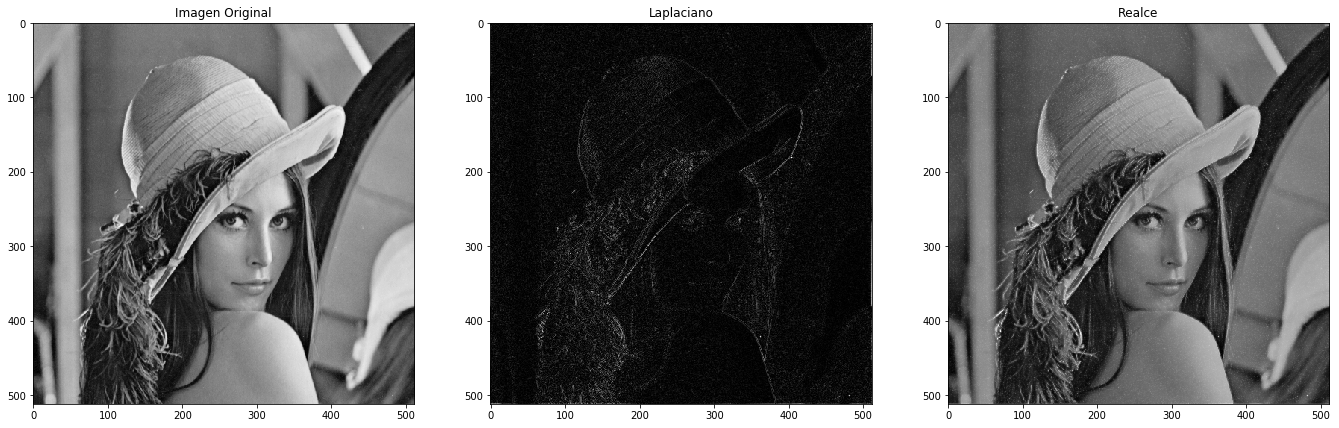

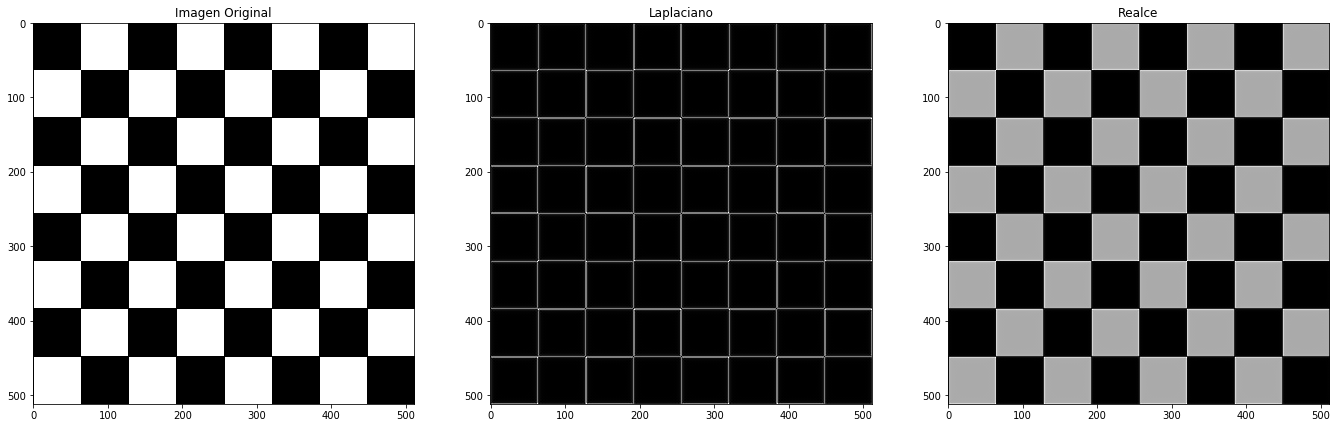

In [102]:
def timeEnhancement(img):
    return cv2.Laplacian(src = img, ddepth = 3)


for i in range(len(img)):
    tmp = frecuencyEnhancement(img[i])
    plt.figure(i)
    plt.subplots_adjust(left=0.0, right=3.0, bottom=0.0, top=3.0)
    plt.subplot(1,3,1), plt.imshow(img[i], cmap='gray')
    plt.title('Imagen Original')
    plt.subplot(1,3,2), plt.imshow(tmp, cmap='gray')
    plt.title('Laplaciano')
    plt.subplot(1,3,3), plt.imshow(img[i] + 0.5*tmp, cmap='gray')
    plt.title('Realce')
    plt.show()

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.2. Dominio frecuencial </h1>

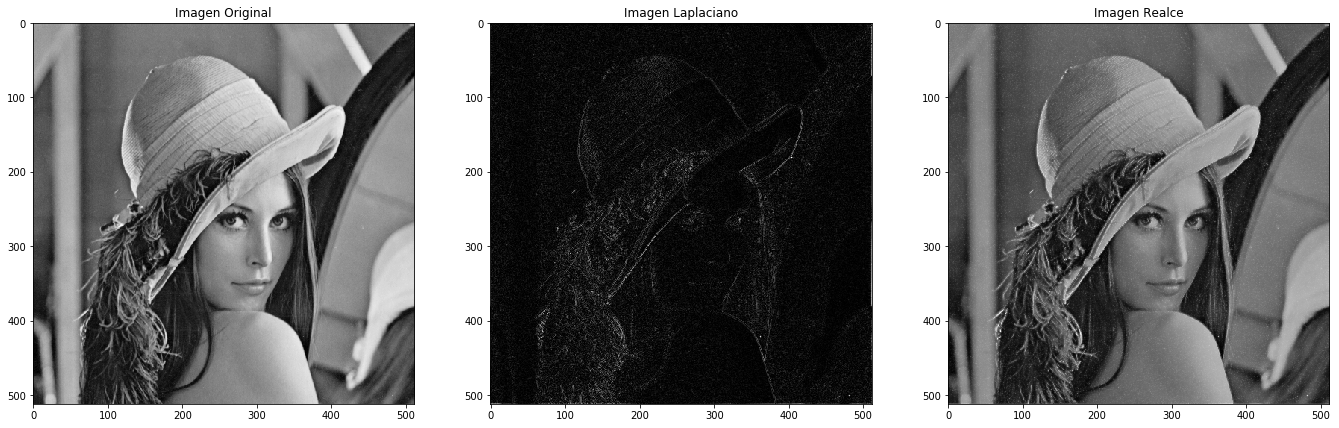

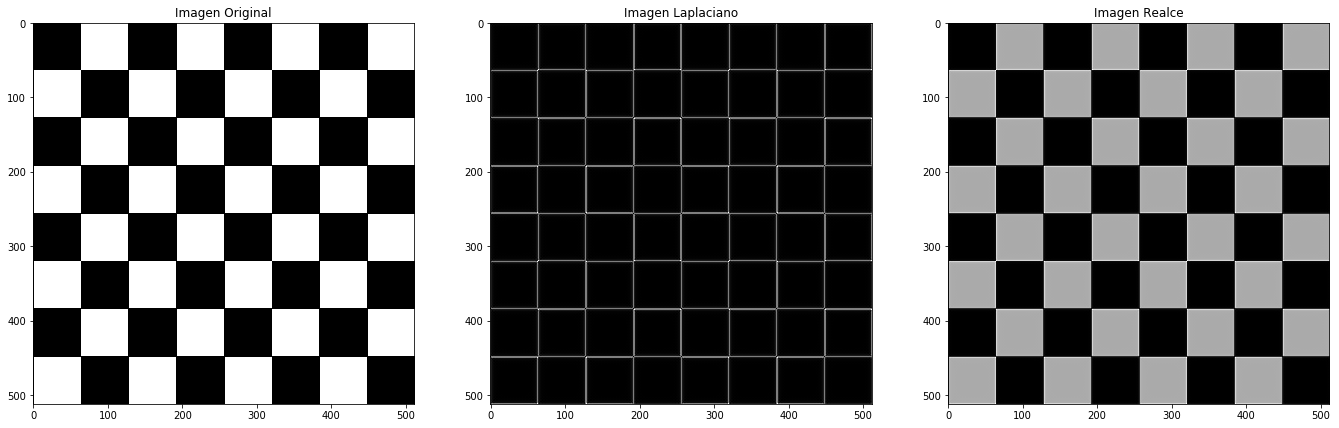

In [103]:
def frecuencyEnhancement(img):
    base = np.matrix([[ (x-img.shape[0]/2)**2+(y-img.shape[1]/2)**2 for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    out = (out-out.min())/(out.max()-out.min())*255
    return out

for i in range(len(img)):
    tmp = frecuencyEnhancement(img[i])
    plt.figure(i)
    plt.subplots_adjust(left=0.0, right=3.0, bottom=0.0, top=3.0)
    plt.subplot(1,3,1), plt.imshow(img[i], cmap='gray')
    plt.title('Imagen Original')
    plt.subplot(1,3,2), plt.imshow(tmp, cmap='gray')
    plt.title('Imagen Laplaciano')
    plt.subplot(1,3,3), plt.imshow(img[i] + 0.5*tmp, cmap='gray')
    plt.title('Imagen Realce')
    plt.show()